### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The independent variable is the congruency of the color and the text; the dependent variable is the duration to recognize the colors and the texts.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis (Ho) is that the population mean duration under the incongruent condition (Ui) is shorter than or equal to population mean duration under the congruent condition (Uc).
The alternative hypotheses (H1) is that the population mean duration under the incongruent condition is longer than the population mean duration under the congruent condition.
Ho: Ui<=Uc;
H1: Ui>Uc.
T-test is used because we are comparing two populations means, the sample size is less than 30 and the standard deviations are unknown.
As we are comparing two population means, we use paied t-test.
The assumptions to use this test are the following:
1. The differences are of measurement variables;
2. Sampling is random and and pairs of observations are independent;
3. The distribution of the mean difference is normal.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stroopdata.csv')

In [3]:
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [6]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The average response time and the standard deviation are 14.05 seconds and 3.56 under the congruent condition; the two measures are 22.02 seconds and 4.80 under the incongruent condition.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

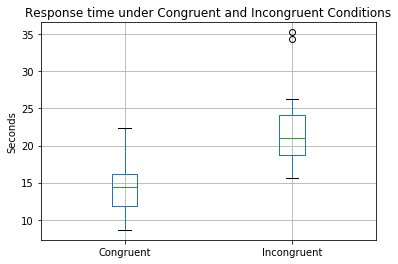

In [8]:
df.boxplot()
plt.title('Response time under Congruent and Incongruent Conditions')
plt.ylabel('Seconds');

The boxplot shows there is an increase in response time under the incongruent situation. It worthes noting that there is an overlap in the response when considering all the data. However, there is a tendency to believe that the incongruent test takes longer than the congruent test.

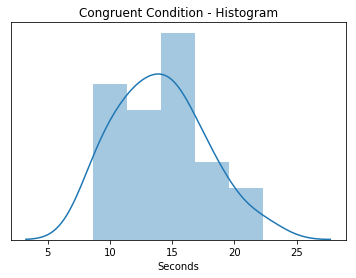

In [8]:
sns.distplot(df['Congruent'])
plt.title('Congruent Condition - Histogram')
plt.yticks([])
plt.xlabel('Seconds');

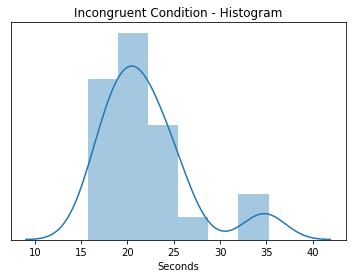

In [9]:
sns.distplot(df['Incongruent'])
plt.title('Incongruent Condition - Histogram')
plt.yticks([])
plt.xlabel('Seconds');

In the histogram of the incongruent testing, there appears to be some outliers on the upper end of the distribution, making the graph somewhat positively skwed. The congreunt histogram resembles closely to a normally distributed curve.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

We know, from running descriptive statistics above, that this dataset containts 24 observations. Therefore the degree of freedom would be 24-1=23.

In [31]:
#t-critical value for a 95% confidence level and 23 d.f.
t.ppf(0.95,23)

1.7138715277470473

The point estimate is the difference between the means: 14.05-22.02=-7.97.

In [42]:
#Calculate the standard deviation of differences;
(df['Congruent']-df['Incongruent']).std()

4.8648269103590556

In [5]:
#t-statistics is calculated as the following:
7.97/(4.865/math.sqrt(24))

8.025666289817853

In [4]:
#Claculating confidence interval
x=(df['Congruent']-df['Incongruent'])
print (stats.t.interval(0.99,loc=x.mean(),df=23))

(-10.772127350434189, -5.1574559828991431)


Since the t-stastic is 8.026 which is greater than the t-critical value, we can reject the null hypothesis and conclude that the reaction time under the incongruent condition is longer than the reaciont time under the congruent situation. The results are aligned with my expectations.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

In order to explain the Stroop Effect, I found an article written by Bryn Farnsworth Ph.D. In his paper "The Stroope Effect - How it works and Why", the author states that "What this reveals is that the brain can’t help but read. As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer."[1] 

Basically, human brains automatically understand the meaning of words as a result of habitual reading. The color recongnition, on the other hand, is not an automatic process. Participants must overcome the initial and stronger stimuli to read the word. Therefore, there is hesitancy to respond.

The Stroop Effect can be observed in daily life. Every day, we could experience the effect when automatic processing (word reading) interrupts with controlled processing (color recongnition). For example, after turning on the laptop, an individual might quickly type in youtube in the web browser instead of opening the assignment because the former is a simpler task to do as a result of habit. In another scenario, it probably takes longer for a person to get up early in the morning to go to the gym rather than just getting up to brush teeth because he brushes teeth on a regular basis, while in order to go to the gym, he needs to overcome the initially stronger impulse to stay in bed for an extra amount of time.

An extention of this experiment would be the emotional Stroop test which is used as an information-processing approach to assessing emotions. Similar to the standard Stroop effect, the emotional Stroop test works by examining the response time of the participant to name colors of negative emotional words. For instance, depressed participants would be slower to indicate the color of depressing words (such as "war", "sad", "cancer") than non-depressing words. These two tests, however, engage different mechanisms of interference. The classic Stroop test creates a conflict between an incongruent color and word (the word "RED" in font color yellow) but the emotional Stroop involves only emotional and neutral words—color does not affect slowing because it does not conflict with word meaning. Thus, the emotional Stroop does not involve an effect of conflict between a word meaning and a color of text, but rather appears to capture attention and slow response time due to the emotional relevance of the word for the individual. The emotional Stroop test has been used broadly in clinical studies using emotional words related to a particular individual's area of concern, such as alcohol-related words for someone who is alcoholic, or words involving a particular phobia for someone with anxiety or phobic disorders. Both the classic and the emotional Stroop tests, however, involve the need to suppress responses to distracting word information, while selectively maintaining attention on the color of the word to complete the task.[2] 

1 https://imotions.com/blog/the-stroop-effect/

2 https://en.wikipedia.org/wiki/Emotional_Stroop_test